In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline

In [2]:
df = pd.read_csv('12cdenhanced.csv')

/anaconda3/envs/geo/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,20,23,36,65,66,68,69,106,135,139,141,142,143,147,159,167,169,178,185,190,191,193,198,207,209,210,212,215,221,237,242,243,246,252,266,268,274,278,280,308,311,312,326,339,340,349,355,358,359,360,361,363,364,410,417,431,439,440) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
geodf = gpd.read_file('election_districts.geojson')

In [4]:
# counter = 0
# def find_elect_dist(row):
#     point = Point(row.Longitude, row.Latitude)
#     return geodf.elect_dist[geodf.geometry.contains(point)]

# test_df = df.iloc[:100, :].copy()
# for i in range(100):
#     print(find_elect_dist(test_df.iloc[i, :]))
#     print(test_df.iloc[i, :]['Precinct'])

In [5]:
def convert_elect_dist(string):
    return string[-2:] + string[-6:-3]
df['elect_dist'] = df.Precinct.apply(convert_elect_dist)

In [6]:
latest_primary_voter_count = pd.DataFrame(df.groupby('elect_dist')['Primary_2018-06-26'].count())

In [7]:
geodf = geodf.merge(latest_primary_voter_count, how = 'inner', on = 'elect_dist')

In [8]:
geodf = geodf.rename(columns = {'Primary_2018-06-26':'primary18'})

In [9]:
geodf.to_file("for_tableau.geojson", driver="GeoJSON")

In [24]:
geodf.columns.values

array(['elect_dist', 'shape_area', 'shape_leng', 'geometry', 'primary18'],
      dtype=object)

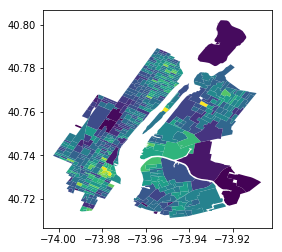

In [25]:
geodf.plot(column = 'primary18')

In [41]:
reg_voters = pd.read_csv('voter_counts/registered_voters.csv')

In [42]:
reg_voters = reg_voters.rename(columns = {'KEY': 'elect_dist'})

In [43]:
reg_voters.drop(reg_voters[reg_voters.elect_dist.isna()].index, inplace = True)

In [44]:
reg_voters.elect_dist = reg_voters.elect_dist.apply(int).apply(str)

In [47]:
geodf = geodf.merge(right = reg_voters[['DEM', 'elect_dist']], how = 'left', on = 'elect_dist')

In [70]:
geodf.DEM = geodf.DEM.apply(lambda x: x.replace(',', '')).apply(int)

In [72]:
geodf['primary18_percent'] = geodf.primary18 / geodf.DEM

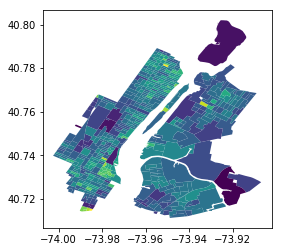

In [73]:
geodf.plot(column = 'primary18_percent')

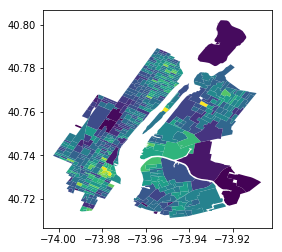

In [74]:
geodf.plot(column = 'primary18')

In [78]:
geodf['coords'] = geodf['geometry'].apply(lambda x: x.representative_point().coords[:])
geodf['coords'] = [coords[0] for coords in geodf['coords']]

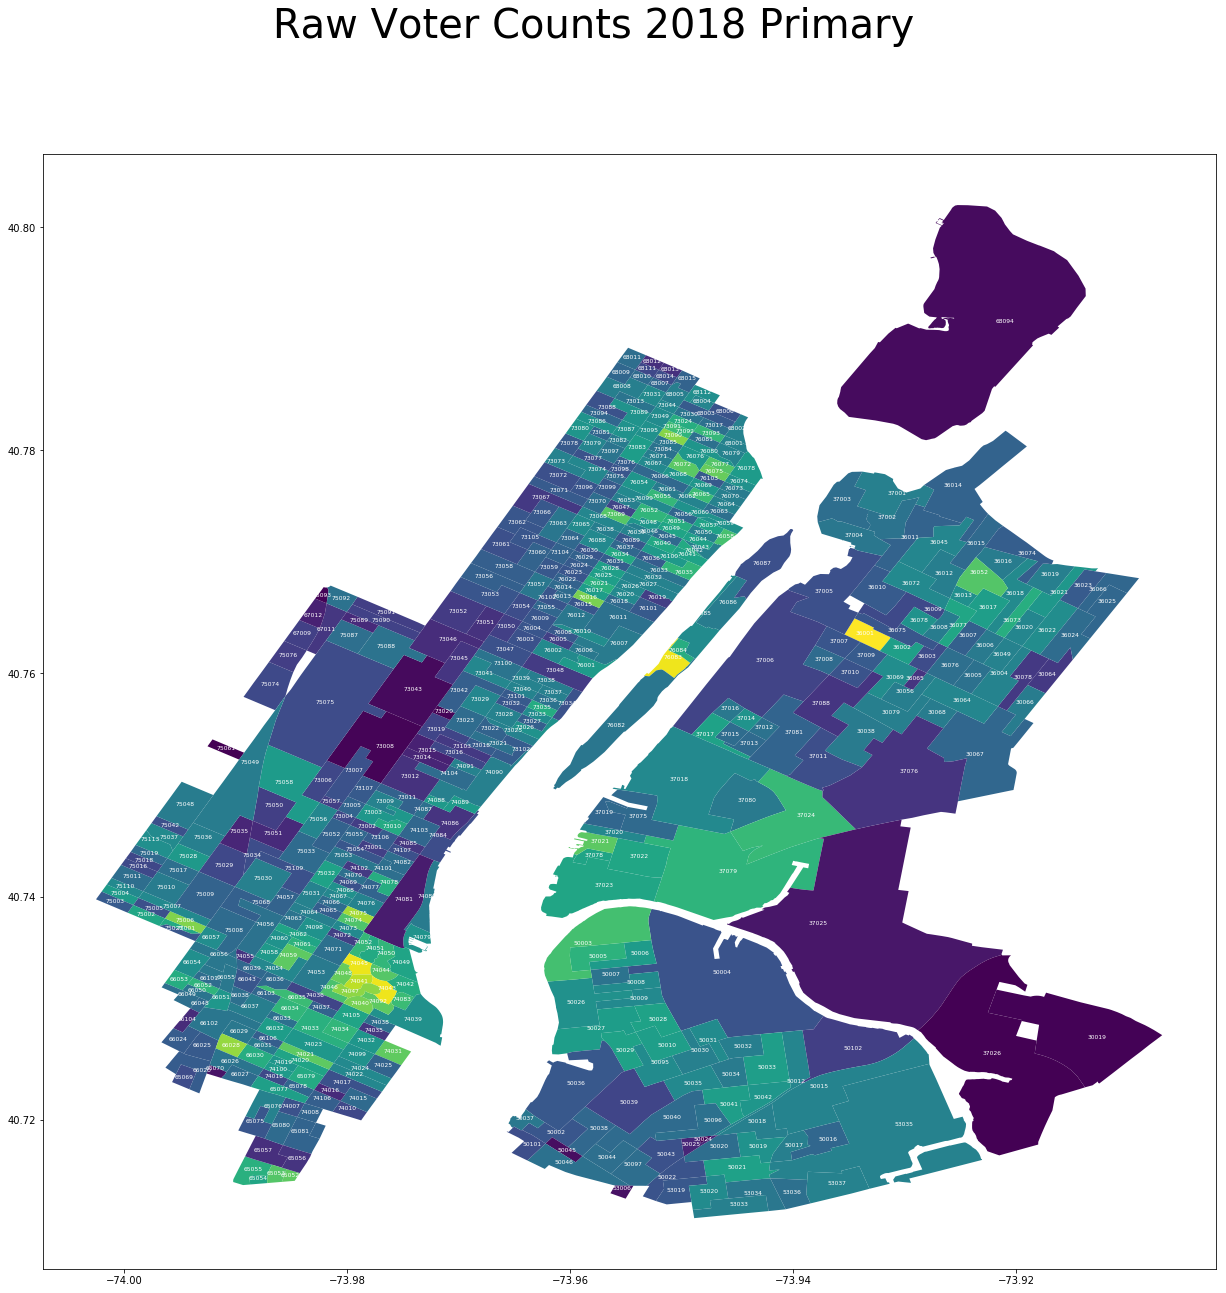

In [106]:
geodf.plot(column = 'primary18')
for idx, row in geodf.iterrows():
    plt.annotate(s=row['elect_dist'], xy=row['coords'],
                 horizontalalignment='center', fontsize = 6, color = 'white')
fig = plt.gcf()
fig.suptitle('Raw Voter Counts 2018 Primary', fontsize = 40)
fig.set_size_inches(40, 20.5)
fig.savefig('Raw Voter Counts 2018 Primary.png', dpi=100)

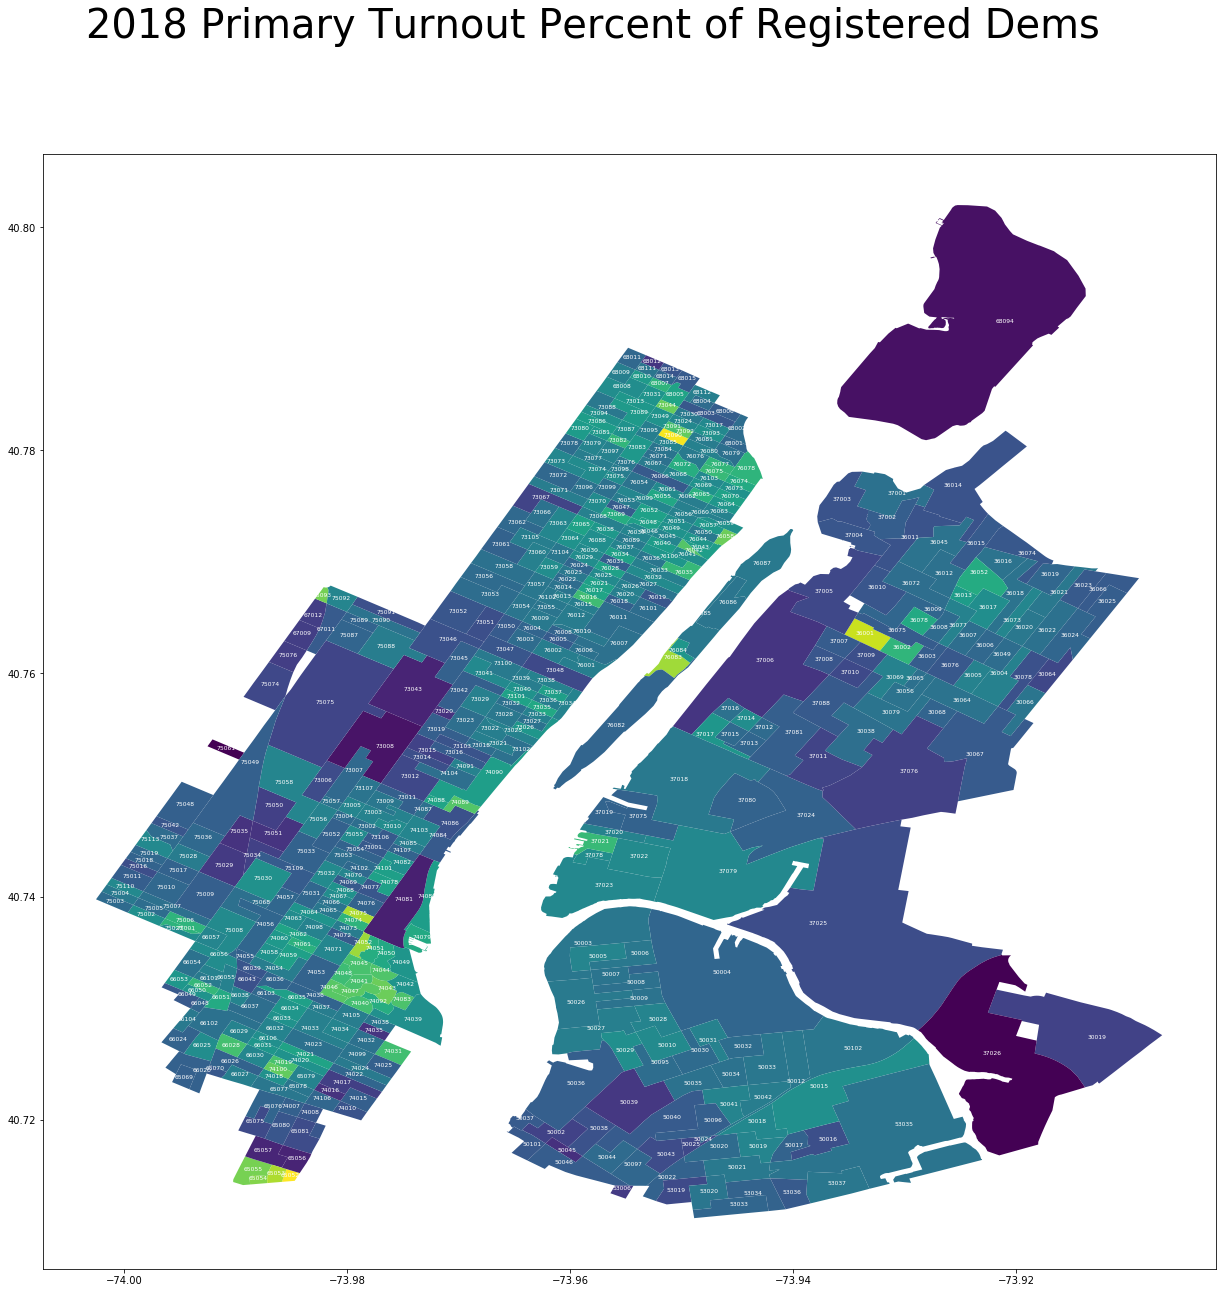

In [105]:
geodf.plot(column = 'primary18_percent')
for idx, row in geodf.iterrows():
    plt.annotate(s=row['elect_dist'], xy=row['coords'],
                 horizontalalignment='center', fontsize = 6, color = 'white')
fig = plt.gcf()
fig.suptitle('2018 Primary Turnout Percent of Registered Dems', fontsize = 40)
fig.set_size_inches(40, 20.5)
fig.savefig('2018 Primary Turnout Percent of Registered Dems.png', dpi=100)

In [109]:
df[df.elect_dist == '73090']

,LALVOTERID,Voters_StateVoterID,Voters_CountyVoterID,Walking_List_Sequence,HH Code,VoterTelephones_FullPhone,VoterTelephones_TelConfidenceCode,VoterTelephones_TelCellFlag,Voters_FirstName,Voters_MiddleName,...,CommercialDataLL_Pro_Choice,BLDG,JCRC,Private_Data Standard Land Line,Private_Data Mobile Phone,School_Board_District,primeny_marriagelicenseinny_Marriage_License_in_NY,primeny_samesexmarriagefemale_Same_Sex_Marriage_Female,primeny_samesexmarriagemale_Same_Sex_Marriage_Male,elect_dist
5973,LALNY105840095,NY000000000037811140,61302921937,6229932,M013253166,(646) 678-5936,1.0,NaN,Arthur,J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73090
31629,LALNY111921784,NY000000000038205266,61305309326,6229562,M004814300,NaN,NaN,NaN,Jonathan,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73090
31630,LALNY104386136,NY000000000037755571,61302378789,6229564,M004814300,NaN,NaN,NaN,Elizabeth,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73090
31631,LALNY110255466,NY000000000038285550,61305641401,6229569,M007189809,NaN,NaN,NaN,Jessica,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73090
31632,LALNY432017883,NY000000000053830125,61411480133,6229581,M020060514,(212) 348-1068,1.0,NaN,Jessica,Medine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73090
31633,LALNY106447092,NY000000000037721233,61301884757,6229586,M007420299,NaN,NaN,NaN,Yael,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73090
31634,LALNY110481958,NY000000000037867701,61303343302,6229601,M010026396,(212) 427-5711,1.0,NaN,Paulina,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73090
31635,LALNY104870392,NY000000000037500384,061T0526844,6229602,M005138057,(212) 987-5758,1.0,NaN,Euralanda,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73090
31636,LALNY104877972,NY000000000038078840,61304693812,6229603,M005287989,NaN,NaN,NaN,Trevor,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73090
31637,LALNY104877968,NY000000000037803128,61302840084,6229604,M005287989,NaN,NaN,NaN,Trelan,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73090


In [115]:
geodf.sort_values(by = 'primary18_percent', ascending = False)

,elect_dist,shape_area,shape_leng,geometry,primary18,DEM,primary18_percent,coords
116,65052,114226.305513,1388.69730213,(POLYGON ((-73.98425853730055 40.7152095788185...,146,461,0.316703,"(-73.98508897418063, 40.714860823180416)"
240,73090,185028.822865,1940.65014154,(POLYGON ((-73.95046408055164 40.7815035072288...,159,510,0.311765,"(-73.95077080994851, 40.78122282359131)"
10,36001,585940.231417,3273.29446991,(POLYGON ((-73.93133626139061 40.7632764411982...,194,666,0.291291,"(-73.93356262462062, 40.76347133828314)"
463,74075,193049.793956,2014.99426993,(POLYGON ((-73.97760270204478 40.7381717955869...,168,604,0.278146,"(-73.97901322469059, 40.738362441495426)"
455,65053,205795.935564,1798.86288128,(POLYGON ((-73.98586696984746 40.7156963600275...,142,511,0.277886,"(-73.98637279737486, 40.715050863744054)"
400,76083,458252.099978,4306.18715501,(POLYGON ((-73.95030282224282 40.7631462318061...,189,697,0.271162,"(-73.95081025514524, 40.76137281754979)"
448,74052,214809.851813,2408.6737484,(POLYGON ((-73.97792798408669 40.7365441463399...,129,477,0.270440,"(-73.97861073261848, 40.73574298015855)"
117,65054,115521.508357,1368.28944439,(POLYGON ((-73.98714239036552 40.7149456819114...,114,441,0.258503,"(-73.98796134631046, 40.71460031050788)"
118,65055,494465.165441,3159.70432833,(POLYGON ((-73.98672137900418 40.7159522515297...,123,488,0.252049,"(-73.98839578422692, 40.71545785520377)"
409,75093,101947.265902,1375.50313117,(POLYGON ((-73.98178946818103 40.7677138630183...,1,4,0.250000,"(-73.98223855900166, 40.766912185161246)"


In [1]:
# scratch work 9/25

In [3]:
gdf = gpd.read_file('oneEDperline.geojson')

In [6]:
gdf.plot(column)

,KEY,shape_area,shape_leng,COUNTY,DEM,REP,CON,WOR,GRE,LBT,...,Religions_Description_Sikh,Religions_Description_nan,Presidential_Primary_1992-04-07,Presidential_Primary_1996-03-07,Presidential_Primary_2000-03-07,Presidential_Primary_2004-03-02,Presidential_Primary_2008-02-05,Presidential_Primary_2012-04-24,Presidential_Primary_2016-04-19,geometry
0,30019,6562554.6097,12107.9462435,Queens,16.0,8.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,1,0,1,(POLYGON ((-73.91734250596248 40.7313828262933...
1,30038,1718535.91452,6632.56666345,Queens,702.0,89.0,3.0,4.0,4.0,0.0,...,0,61,1,0,13,15,32,0,81,(POLYGON ((-73.93463208989155 40.7569397537664...
2,30056,689270.346327,4207.71652639,Queens,677.0,105.0,2.0,3.0,8.0,1.0,...,0,40,1,0,10,15,28,0,72,(POLYGON ((-73.92724676769954 40.7596709162830...
3,30064,638266.798528,4079.26877142,Queens,479.0,63.0,1.0,1.0,0.0,1.0,...,0,23,1,0,7,6,20,0,33,(POLYGON ((-73.91494209754565 40.7612428381817...
4,30066,682007.835657,4328.07597629,Queens,659.0,82.0,2.0,4.0,5.0,0.0,...,0,50,1,0,6,11,41,0,83,(POLYGON ((-73.91740379556343 40.7582239842378...
5,30067,4267147.69016,11795.2815335,Queens,714.0,73.0,1.0,2.0,3.0,0.0,...,2,46,0,0,8,11,35,0,71,(POLYGON ((-73.92086506749443 40.7566782022124...
6,30068,516268.260645,2884.07917496,Queens,803.0,75.0,2.0,6.0,3.0,0.0,...,1,53,2,0,24,22,49,0,83,(POLYGON ((-73.92530122646993 40.7566287555843...
7,30069,835948.985909,4495.29890471,Queens,670.0,127.0,3.0,4.0,3.0,0.0,...,0,54,1,0,19,25,51,0,92,(POLYGON ((-73.92965061967554 40.7607977615868...
8,30078,778672.315509,5016.39872426,Queens,407.0,65.0,3.0,2.0,0.0,4.0,...,0,27,0,0,2,1,10,0,29,(POLYGON ((-73.91788807954288 40.7616950758093...
9,30079,1122008.02731,5551.79172082,Queens,682.0,63.0,5.0,1.0,3.0,1.0,...,0,63,0,0,2,5,11,0,54,(POLYGON ((-73.93215200341925 40.7577103853274...
